# <b>Pivot Tables</b>

In [557]:
import numpy as np
import pandas as pd
import seaborn as sns

In [558]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [559]:
titanic.shape

(891, 15)

In [560]:
'''
✅ titanic.groupby('sex')['survived'].mean()
Returns a Series
    -Only the 'survived' column is selected as a Series before calculating the group mean.
'''
titanic.groupby('sex')['survived'].mean()
# .shape    (2,) (Series)
#print(type(titanic.groupby('sex')['survived'].mean())) <class 'pandas.core.series.Series'>

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [561]:
'''
✅ titanic.groupby('sex')[['survived']].mean()
Returns a DataFrame
    -The double brackets [[ ]] keep 'survived' as a DataFrame, so the result is also a DataFrame with the column name and index.
'''
titanic.groupby('sex')[['survived']].mean()
# .shape    (2, 1)  (DataFrame)
#print(type(titanic.groupby('sex')[['survived']].mean()))   <class 'pandas.core.frame.DataFrame'>

,survived
sex,
female,0.742038
male,0.188908


In [562]:
df1 = pd.DataFrame({
    'color': ['red', 'red', 'blue'],
    'shape': ['circle', 'square', 'circle'],
    'value': [1, 2, 3]
})
'''
2. Without pd.Categorical(...):
    -color and shape are plain Python strings (object dtype).
    -Uses more memory.
    -Slower in certain operations.
    -No inherent knowledge of "categories."
'''
df1

,color,shape,value
0,red,circle,1
1,red,square,2
2,blue,circle,3


In [563]:
df = pd.DataFrame({
    'color': pd.Categorical(['red', 'red', 'blue']),
    'shape': pd.Categorical(['circle', 'square', 'circle']),
    'value': [1, 2, 3]
})
'''
1. With pd.Categorical(...):
    -'color' and 'shape' columns are Categorical data types.
    -They store values more efficiently (internally as integers with category labels).
This is great when:
    -You have repeated values (like 'red', 'blue', 'red', etc.)
    -You want to perform grouped or analytical operations faster.
    -You want to explicitly define the categories or their order.
'''

'''
🔍 Why it matters:
Let’s say you group by 'color' and 'shape'. If you use Categorical, Pandas can track all possible combinations of levels — even if some are missing — and that’s where observed=True/False makes a difference (like you just asked earlier).

✅ When to use Categorical:
    -You’re grouping by the column often.
    -You want to control the order of levels (e.g., ['small', 'medium', 'large']).
    -You want to optimize memory usage.
'''
df

,color,shape,value
0,red,circle,1
1,red,square,2
2,blue,circle,3


In [564]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].mean()
# .shape  (6,)

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [565]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].mean().reset_index()
#Using .reset_index() on a grouped Series turns it into a proper DataFrame by converting the index levels (like 'sex' and 'class') into columns.

,sex,class,survived
0,female,First,0.968085
1,female,Second,0.921053
2,female,Third,0.500000
3,male,First,0.368852
4,male,Second,0.157407
5,male,Third,0.135447


In [566]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].mean().rename('mean survival')
'''
✅ Output
This will return a Series with the same index (sex, class), but the name of the column (actually, the name of the Series) will be 'mean survival' instead of the default 'survived'.
If you also plan to use .reset_index() or .unstack() later and want a proper DataFrame, this will work nicely too:(next cell)
'''


"\n✅ Output\nThis will return a Series with the same index (sex, class), but the name of the column (actually, the name of the Series) will be 'mean survival' instead of the default 'survived'.\nIf you also plan to use .reset_index() or .unstack() later and want a proper DataFrame, this will work nicely too:(next cell)\n"

In [567]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].mean().rename('mean survival').reset_index()
# .shape    (6, 3)


,sex,class,mean survival
0,female,First,0.968085
1,female,Second,0.921053
2,female,Third,0.500000
3,male,First,0.368852
4,male,Second,0.157407
5,male,Third,0.135447


In [568]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].mean().unstack()
# .shape    (2,3)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [569]:
titanic.groupby(['sex', 'class'], observed=True)[['survived', 'fare']].aggregate(['mean', 'max']).unstack()
# .shape    (2, 12)

survived                                               fare  \
            mean                       max                     mean   
class      First    Second     Third First Second Third       First   
sex                                                                   
female  0.968085  0.921053  0.500000     1      1     1  106.125798   
male    0.368852  0.157407  0.135447     1      1     1   67.226127   

                                                      
                                   max                
class      Second      Third     First Second  Third  
sex                                                   
female  21.970121  16.118810  512.3292   65.0  69.55  
male    19.741782  12.661633  512.3292   73.5  69.55

## <b>Pivot Table Syntax</b>

In [570]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean', observed=True)
# .shape    (2, 3)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## <b>Multilevel Pivot Tables</b>

In [571]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index= ['sex', age], columns='class',aggfunc='mean', observed=True)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [572]:
# age.shape   (891,)
type(age)

pandas.core.series.Series

In [573]:
titanic.groupby(['sex', age, 'class'], observed=True)['survived'].mean().unstack()

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [574]:
# Bin the fare into 2 quantiles and store it as a new column
titanic['age_bin'] = pd.cut(titanic['age'], [0, 18, 80])
titanic['fare_bin'] = pd.qcut(titanic['fare'], 2)
# fare = pd.qcut(titanic['fare'], 2)
s = titanic.pivot_table('survived', ['sex', 'age_bin'], ['fare_bin', 'class'], margins = True, margins_name= 'All', observed=True)
# s.shape (5, 7)

'''
✅ What the "All" column means:
    Each row's "All" column value is the mean survival rate across all fare bins and classes for that group of passengers.

For example:
female, (0,18]  → All = 0.676471
This means that, among female passengers aged 0 to 18, the overall survival rate (regardless of fare or class) was ~67.6%.

✅ What the "All" row means:
    Each column in the "All" row gives the mean survival rate across all passengers (regardless of sex or age) for that combination of fare bin and class.

For example:
All → Second class, fare_bin (-0.001, 14.454] = 0.361446
That means among all Second-class passengers who paid a lower fare, ~36.1% survived.
✅ And the bottom-right cell (All, All):
0.406162
This is the overall survival rate for the entire Titanic dataset, regardless of age, sex, fare, or class.


This 0.406162 survival rate is the overall mean only among the rows that have non-null values for:
    -'survived'
    -'age' (used for age_bin)
    -'fare' (used for fare_bin)
    -'class'
    -'sex'
🛑 So if a passenger was missing any of those values, they’re excluded from this calculation.
'''
s

fare_bin        (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age_bin                                                           
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   
All                          0.0  0.361446  0.230469          0.670330   

fare_bin                                  All  
class              Second     Third            
sex    age_bin                                 
female (0, 18]   1.000000  0.318182  0.676471  
       (18, 80]  0.914286  0.391304  0.782383  
male   (0, 18]   0.818182  0.178571  0.338028  
       (18, 80]  0.030303  0.192308  0.180628  
All              0.588889  0.262626  0.406162

In [575]:
s.loc[('female', pd.Interval(0, 18, closed='right')), 
                   (pd.Interval(14.454, 512.329, closed='right'), 'First')]


0.9090909090909091

In [576]:
# This assumes your pivot table is stored in a variable called `my_table`
s.loc[:, pd.IndexSlice[pd.Interval(-0.001, 14.454, closed='right'), 'First']].isna().all().all()
#It checks if all values in that specific fare/class column are NaN.

'''
This selects one specific column:
The one where:
    fare_bin is (-0.001, 14.454]
    class is 'First'
So now you’ve isolated just this single column of the DataFrame.
❓ Then .isna().all().all()?
    -.isna() → creates a Boolean mask where each value is True if it’s NaN
    -.all() (the first one) → checks if all rows in the column are True (i.e., all are NaN)
    -.all() (the second one) → not strictly needed here (you could omit it), but it just collapses the result to a single Boolean if needed for wider selections.

#🟢 It tells you whether all values are NaN in the 'First' class of the lowest fare bin.
'''


"\nThis selects one specific column:\nThe one where:\n    fare_bin is (-0.001, 14.454]\n    class is 'First'\nSo now you’ve isolated just this single column of the DataFrame.\n❓ Then .isna().all().all()?\n    -.isna() → creates a Boolean mask where each value is True if it’s NaN\n    -.all() (the first one) → checks if all rows in the column are True (i.e., all are NaN)\n    -.all() (the second one) → not strictly needed here (you could omit it), but it just collapses the result to a single Boolean if needed for wider selections.\n\n#🟢 It tells you whether all values are NaN in the 'First' class of the lowest fare bin.\n"

In [577]:
fare = pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64, right]): [(-0.001, 14.454] < (14.454, 512.329]]

In [578]:
# Bin age and fare into new columns
titanic['age_bin'] = pd.cut(titanic['age'], [0, 18, 80])
titanic['fare_bin'] = pd.qcut(titanic['fare'], 2)

# Set class as a proper ordered categorical
titanic['class'] = pd.Categorical(
    titanic['class'],
    categories=['First', 'Second', 'Third'],
    ordered=True
)

# Group and unstack properly
result = (
    titanic
    .groupby(['sex', 'age_bin', 'fare_bin', 'class'], observed=True)['survived']
    .mean()
    .unstack(['fare_bin', 'class'])
)

# Sort the columns so class stays in First → Third order
result = result.sort_index(axis=1, level=['fare_bin', 'class'])
result


fare_bin        (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age_bin                                                           
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare_bin                             
class              Second     Third  
sex    age_bin                       
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [579]:
result.loc[('female', pd.Interval(0, 18, closed='right')), 
                   (pd.Interval(14.454, 512.329, closed='right'), 'First')]


0.9090909090909091

In [580]:
# fare = pd.qcut(titanic['fare'], 2, duplicates='drop')
fare.value_counts()


fare
(-0.001, 14.454]     447
(14.454, 512.329]    444
Name: count, dtype: int64

## <b>Additional Pivot Table Options</b>

In [581]:
# titanic.groupby(['sex', 'class'], observed=True)[['fare', 'survived']].aggregate({'fare':'mean','survived': 'sum'}).unstack()
titanic.groupby(['sex', 'class'], observed=True).aggregate({'fare':'mean','survived': 'sum'}).unstack()

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [582]:
titanic.pivot_table(index='sex', columns='class', observed=True,
aggfunc={'survived':'sum', 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [583]:
titanic.pivot_table('survived',index='sex', columns='class', observed=True, margins=True)
'''
✅ This 0.383838 value includes all passengers in the dataset — regardless of whether they have missing age or fare.

📌 So it gives you the raw overall survival rate of everyone on the Titanic whose survived field is known.
'''

'\n✅ This 0.383838 value includes all passengers in the dataset — regardless of whether they have missing age or fare.\n\n📌 So it gives you the raw overall survival rate of everyone on the Titanic whose survived field is known.\n'

In [584]:
# Count of all passengers with known survival status
titanic['survived'].notna().sum()  #891

# Count of passengers used in the binned table
titanic.dropna(subset=['age', 'fare', 'class', 'sex', 'survived']).shape[0] #714


714

In [585]:
# With fare and age bins
titanic['age_bin'] = pd.cut(titanic['age'], [0, 18, 80])
titanic['fare_bin'] = pd.qcut(titanic['fare'], 2)
s = titanic.pivot_table('survived', ['sex', 'age_bin'], ['fare_bin', 'class'], margins=True, margins_name='All', observed=True)
s
'''
🔍 So which is the "real" total?
✅ If you're asking “what proportion of passengers survived on the Titanic?”, go with 0.383838 — it uses the largest set of data.

✅ If you're analyzing survival within a more complete subset of data (where age and fare are available), then 0.406162 reflects the average survival rate for that filtered subset.

'''

'\n🔍 So which is the "real" total?\n✅ If you\'re asking “what proportion of passengers survived on the Titanic?”, go with 0.383838 — it uses the largest set of data.\n\n✅ If you\'re analyzing survival within a more complete subset of data (where age and fare are available), then 0.406162 reflects the average survival rate for that filtered subset.\n\n'

## <b>Example: Birthrate Data</b>

In [586]:
import os

# Create 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the file
!curl -o data/births.csv https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   189k      0  0:00:01  0:00:01 --:--:--  190k


In [587]:
births = pd.read_csv('data/births.csv')
births.head()
# births.shape #(15547, 5)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [588]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender',
aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [589]:
# Aggregate births by gender and decade
births.groupby(['decade', 'gender'])['births'].sum().unstack()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [590]:
# Aggregate births by gender and decade
births_grouped = births.groupby(['decade', 'gender'])['births'].sum().unstack()

# Now calculate the difference between male and female births
births_grouped['difference'] = round(((births_grouped['M'] - births_grouped['F']) / births_grouped['M'])* 100, 2)

# Pivot table (though you can directly use the grouped data)

# births_grouped[['M', 'F', 'difference']]
# or 
births_grouped

gender,F,M,difference
decade,,,
1960,1753634,1846572,5.03
1970,16263075,17121550,5.01
1980,18310351,19243452,4.85
1990,19479454,20420553,4.61
2000,18229309,19106428,4.59


In [591]:
births.groupby(['decade','gender'], observed= True).aggregate({'births': 'sum'}).unstack()

births          
gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428

In [592]:
births.groupby(['decade', 'gender'])['births'].aggregate('sum').unstack()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [593]:
births.groupby(['decade', 'gender'])['births'].sum().unstack()


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


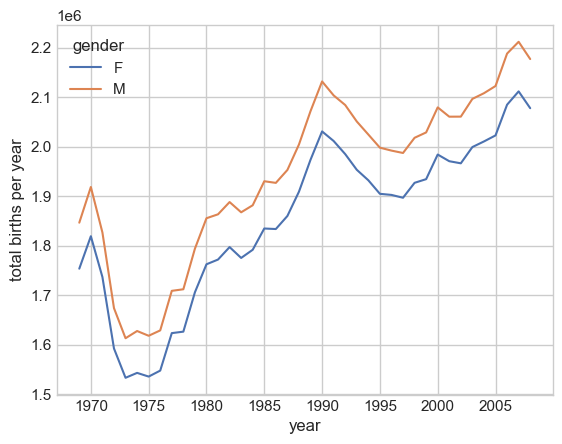

In [594]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [595]:
# Filter rows for June 31st
june_31 = births[(births['month'] == 6) & (births['day'] >= 31)]

# Check if the DataFrame is empty
if june_31.empty:
    print("No data for June 31st.")
else:
    print(june_31.shape)
#(48, 6)

(48, 6)


In [596]:
births['day'].dtype

dtype('float64')

In [599]:
births['day'].isna().any()

True

In [612]:
# births[births['day'].isna()]['day'].dtype     dtype('float64')
# births[births['day'].isna()]['day'].shape   (480,)

births[births['day'].isna()]

,year,month,day,gender,births,decade
15067,1989,1,NaN,F,156749,1980
15068,1989,1,NaN,M,164052,1980
15069,1989,2,NaN,F,146710,1980
15070,1989,2,NaN,M,154047,1980
15071,1989,3,NaN,F,165889,1980
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [600]:
#✅ Count the number of NaN values in a column:
births['day'].isna().sum()  #480

480

In [597]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [598]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sigma_clipped_births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
sigma_clipped_births.head()
# sigma_clipped_births.shape  #(14610, 6)
#before: #(15547, 5)

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [601]:
sigma_clipped_births['day'].dtype

dtype('float64')

In [618]:
sigma_clipped_births['year'].dtype

dtype('int64')

In [620]:
sigma_clipped_births['month'].dtype

dtype('int64')

In [619]:
sigma_clipped_births[sigma_clipped_births['day'].isna()]
sigma_clipped_births[sigma_clipped_births['year'].isna()]

,year,month,day,gender,births,decade


In [617]:
# set 'day' column to integer; it originally was a string due to nulls
sigma_clipped_births.loc[:,'day'] = sigma_clipped_births.loc[:,'day'].astype(int)

In [622]:
sigma_clipped_births.columns

Index(['year', 'month', 'day', 'gender', 'births', 'decade'], dtype='object')

In [628]:
sigma_clipped_births.index = pd.to_datetime(10000 * sigma_clipped_births.year + 
                                            100 * sigma_clipped_births.month + 
                                            sigma_clipped_births.day, format = '%Y%m%d')
sigma_clipped_births.loc[:, 'dayofweek'] = sigma_clipped_births.index.dayofweek

In [632]:
sigma_clipped_births.head()
# sigma_clipped_births.shape  #(14610, 7)

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [649]:
sigma_clipped_births.tail()

,year,month,day,gender,births,decade,dayofweek
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5
1988-12-31,1988,12,31,M,4698,1980,5


In [635]:
sigma_clipped_births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


In [637]:
sigma_clipped_births.groupby(['dayofweek','decade'])['births'].aggregate('mean').unstack()

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


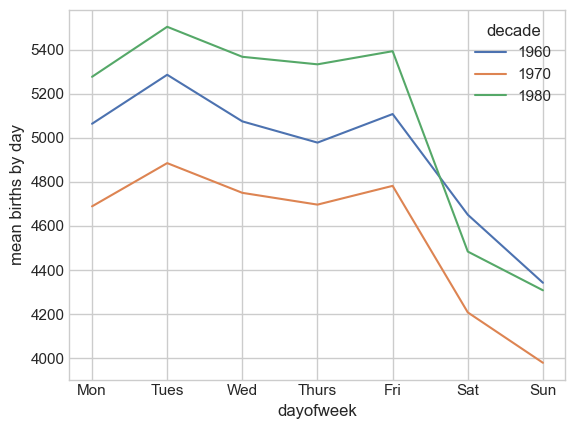

In [641]:
import matplotlib.pyplot as plt
import matplotlib as mpl
sigma_clipped_births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7),
xticklabels=['Mon', 'Tues', 'Wed', 'Thurs',
'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [ ]:
sigma_clipped_births.groupby(['month', 'day'])['births'].aggregate('mean')
'''
👉 Groups using the actual month and day columns in the DataFrame.

This works only if your DataFrame already has month and day as columns. For example, this would fail if you had dropped those columns after creating a datetime index.
'''

month  day
1      1      4009.225
       2      4247.400
       3      4500.900
       4      4571.350
       5      4603.625
                ...   
12     27     4850.150
       28     5044.200
       29     5120.150
       30     5172.350
       31     4859.200
Name: births, Length: 366, dtype: float64

In [651]:
sigma_clipped_births.groupby(
    [sigma_clipped_births.index.month, sigma_clipped_births.index.day]
)['births'].mean()
'''
👉 Groups using the month and day extracted from the DatetimeIndex (i.e., from the index of the DataFrame).

This is useful when your date is in the index, like here:
    sigma_clipped_births.index = pd.to_datetime(...)
So this version works even if you don't have month and day columns anymore.
'''

1   1     4009.225
    2     4247.400
    3     4500.900
    4     4571.350
    5     4603.625
            ...   
12  27    4850.150
    28    5044.200
    29    5120.150
    30    5172.350
    31    4859.200
Name: births, Length: 366, dtype: float64

In [652]:
sigma_clipped_births.groupby(
    [sigma_clipped_births.index.month, sigma_clipped_births.index.day]
)['births'].mean().to_frame()

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [648]:
births_by_date = sigma_clipped_births.pivot_table('births',
[sigma_clipped_births.index.month, sigma_clipped_births.index.day])
births_by_date
# .shape  #(366, 1)

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [667]:
births_by_date.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)

In [661]:
from datetime import datetime
births_by_date.index = [datetime(2012, d.month, d.day) for d in births_by_date.index]

births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


In [666]:
type(births_by_date)

pandas.core.frame.DataFrame

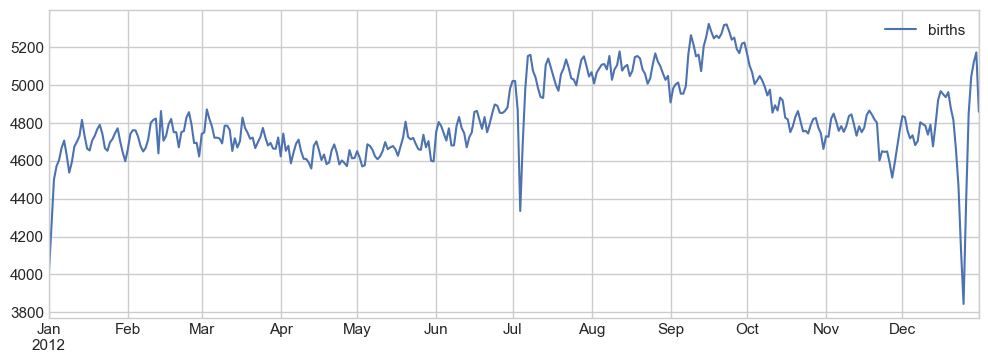

In [662]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);